In [1]:
import numpy as np #for all our numerical needs
from scipy.io.wavfile import read as wavread #we can read wavfiles this way
import chromagen #This module contains all the frequency analysis tools
import matplotlib.pyplot as plt #data visualization
from IPython import display #this lets us listen to the track

In [2]:
rate, data = wavread("demo_materials/Moonlight Sonata First Two Measures.wav")
# import data of music
data = data[:-15000,:]#I'm cutting this to an appropriate note. No special reason to slice off the end
print(data.shape)

(670968, 2)


Notice that this is a stereo .WAV file. We would like to only deal with one channel of data, so lets average them.

In [3]:
data = np.average(data,axis = 1)
print(data.shape)
display.Audio(data,rate=rate)

(670968,)


Now we have an array of data representing the sound waves of the audio. Listen to it so you can get a feel for the musical intervals. 

Let's take a Short-Time Fourier Transform to get frequency data at regular intervals throughout the file. In this example, the input **data** is our array named "data", we are using 10000 samples (**windowlen**=10000) in every Fast-Fourier Transform (FFT), the **rate**, which is used to calculate the frequency spacing, is just our rate obtained from the file, and the **windowtype** (which weights the samples in each FFT) is Hann, which results in smoother values at the edges of each FFT window. If you're familiar with STFT algorithms, you will notice that I haven't specified how much each of the FFT windows should overlap (sometimes called hop-size). The chromagen.stft algorithm uses hop-size = windowlength/2

In [4]:
f, t, d = chromagen.stft(data,10000,rate, windowtype = "Hann")
print(d.shape)
print(f.shape)


(5000, 263)
(5000,)


Great. It looks like we have an STFT comprised of 263 FFTs. The data represents 5000 individual frequencies!

Now we will make a spectrogram with this data. This will tell us how much each of the 128 MIDI pitches are represented during each FFT.

In [5]:
midi_weights = chromagen.spectrogram(f,d)
print(midi_weights.shape)

(128, 263)


Now the variable **midi_weights** is an array holding the unnormalized sum of the magnitude of the FFT coefficients associated with each MIDI pitch for every one of the 263 FFTs. Let's see what it looks like.



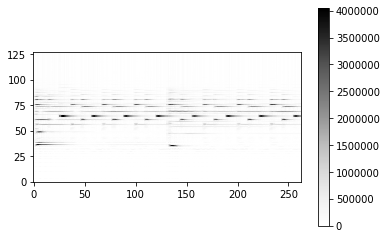

In [6]:
plt.imshow(midi_weights, cmap = 'Greys', origin = 'lower')
plt.colorbar()
plt.show()

Next, I will generate a chromagram for this data. This will show me how much each of the 12 chromas is represented on each of the 263 time intervals. We already did the spectrogram step, so we pass the spectrogram as an argument rather than a frequency array and a 2-D Fourier Coefficient array.

(12, 263)
[ 704287.47432223  874820.84573132 1816797.22410448 4313081.39733019
 4777441.62651049 2271805.65256076 2465534.37998115  682426.30774878
 1787692.9812192   745385.2570747   933733.05937664 4080458.79774058]


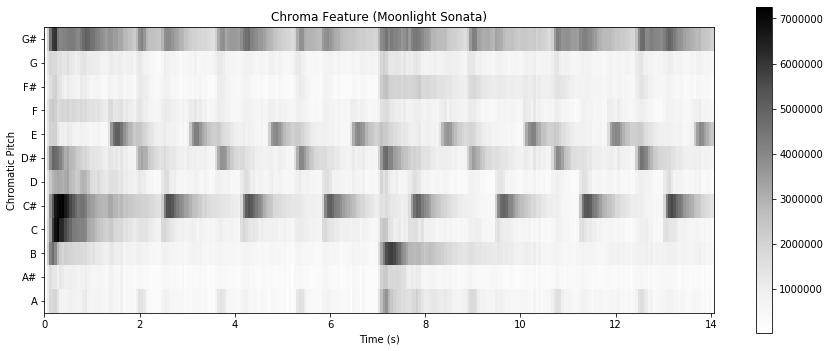

In [7]:
cg = chromagen.chromagram(F_arr = f,Chi = d)
plt.figure(figsize=(15, 6))
plt.imshow(cg, origin="lower", cmap="Greys", aspect=.5, extent =[0,14.0625,-.5,11.5])
#plt.imshow(chromagram, origin="lower", cmap="Greys", aspect=8)
labels = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
labels = np.roll(labels,3)
plt.yticks(np.linspace(0,11,12),labels)
plt.ylabel("Chromatic Pitch")
plt.xlabel("Time (s)")
plt.title("Chroma Feature (Moonlight Sonata)")
print(cg.shape)
print(cg[:,12])
plt.colorbar()
plt.show()